In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("medical_insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


In [7]:
df.describe(include='object').T

,count,unique,top,freq
sex,2772,2,male,1406
smoker,2772,2,no,2208
region,2772,4,southeast,766


Visualize Target

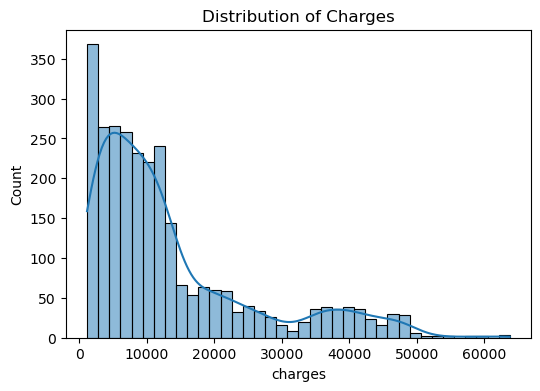

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Charges")
plt.show()


Check Skew Numerically

In [9]:
df['charges'].skew()

np.float64(1.511315043602352)

Log Transform Target

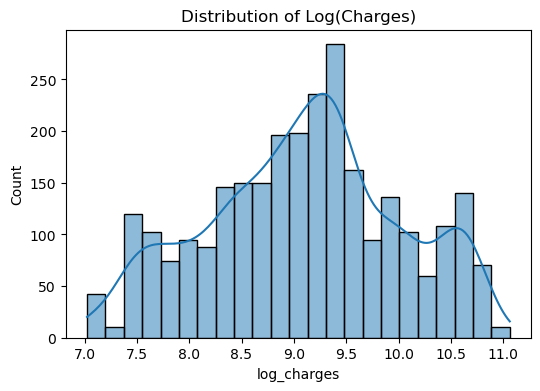

In [10]:
import numpy as np

df['log_charges'] = np.log1p(df['charges'])

plt.figure(figsize=(6,4))
sns.histplot(df['log_charges'], kde=True)
plt.title("Distribution of Log(Charges)")
plt.show()


Visualize Numerical Features

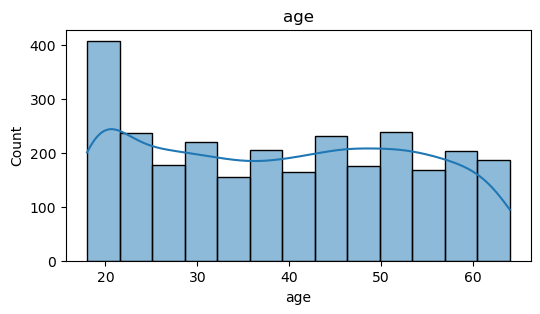

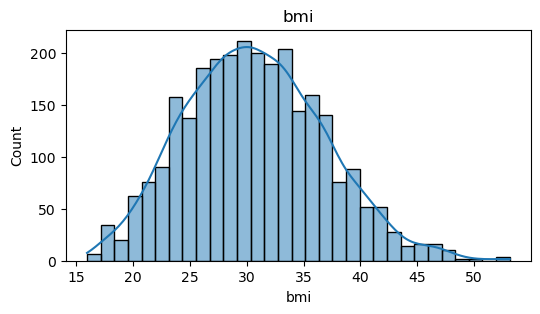

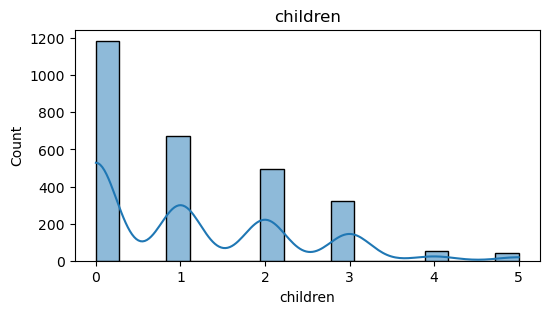

In [11]:
for col in ['age','bmi','children']:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


Target vs Categorical Features

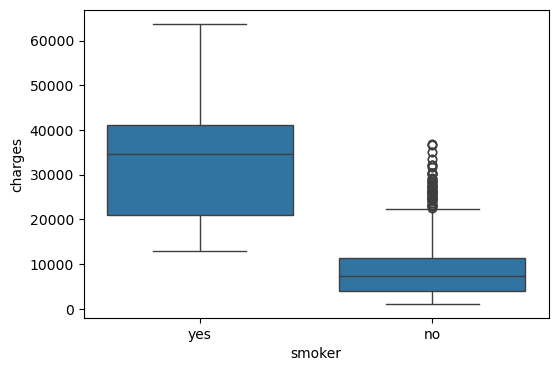

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()


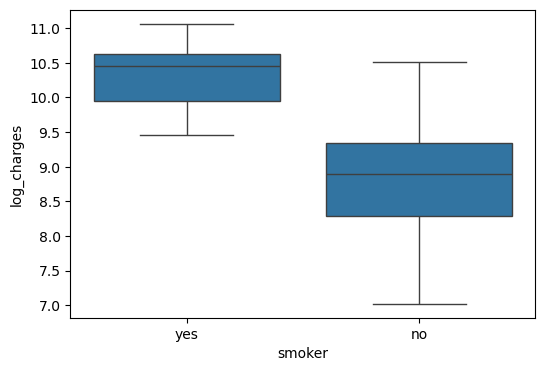

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='log_charges', data=df)
plt.show()


Encode Categorical Variables

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236
1,18,male,33.770,1,no,southeast,1725.55230,7.453882
2,28,male,33.000,3,no,southeast,4449.46200,8.400763
3,33,male,22.705,0,no,northwest,21984.47061,9.998137
4,32,male,28.880,0,no,northwest,3866.85520,8.260455


In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,9.734236,False,True,False,False,True
1,18,33.770,1,1725.55230,7.453882,True,False,False,True,False
2,28,33.000,3,4449.46200,8.400763,True,False,False,True,False
3,33,22.705,0,21984.47061,9.998137,True,False,True,False,False
4,32,28.880,0,3866.85520,8.260455,True,False,True,False,False


# One-Hot Encoding using pd.get_dummies()

When we run:

df_encoded = pd.get_dummies(df, drop_first=True)

We convert categorical variables into numerical format.

---

## Why Do We Need Encoding?

Machine learning models work with numbers.

They cannot understand:

- "male"
- "female"
- "yes"
- "no"
- "northwest"

So we convert categories into binary columns (0 or 1).

---

## What is One-Hot Encoding?

For a categorical variable with k categories:

We create k binary columns:

Example: region

Original:
region = ["northwest", "southeast", "southwest", "northeast"]

After encoding:

region_northwest
region_southeast
region_southwest
region_northeast

Each row gets:

1 → if belongs to that category  
0 → otherwise  

---

## Why drop_first=True?

If we create all k columns, we introduce multicollinearity.

Example:

If:
region_northwest = 0  
region_southeast = 0  
region_southwest = 0  

Then we automatically know it must be:
region_northeast = 1  

So one column is redundant.

This is called the **Dummy Variable Trap**.

To avoid this, we drop one category.

That dropped category becomes the **reference category**.

Model coefficients are interpreted relative to it.

---

## What Happened in Our Dataset?

Original categorical variables:

- sex
- smoker
- region

After encoding:

- sex_male
- smoker_yes
- region_northwest
- region_southeast
- region_southwest

Reference categories are:

- female
- non-smoker
- region_northeast

So if all region columns are 0 → it means northeast.

---

## Why Is This Important?

Now the regression model will learn:

Coefficient of smoker_yes =
How much extra log_charges a smoker pays compared to non-smoker.

Coefficient of sex_male =
Difference compared to female.

This gives interpretability.

---

## Summary

pd.get_dummies() performs One-Hot Encoding.

drop_first=True:
- Prevents multicollinearity
- Avoids dummy trap
- Keeps model stable

One-hot encoding converts categories into numbers without implying order.


In [16]:
X = df_encoded.drop(['charges','log_charges'], axis=1)
y = df_encoded['log_charges']

X.shape, y.shape


((2772, 8), (2772,))

Correlation Heatmap

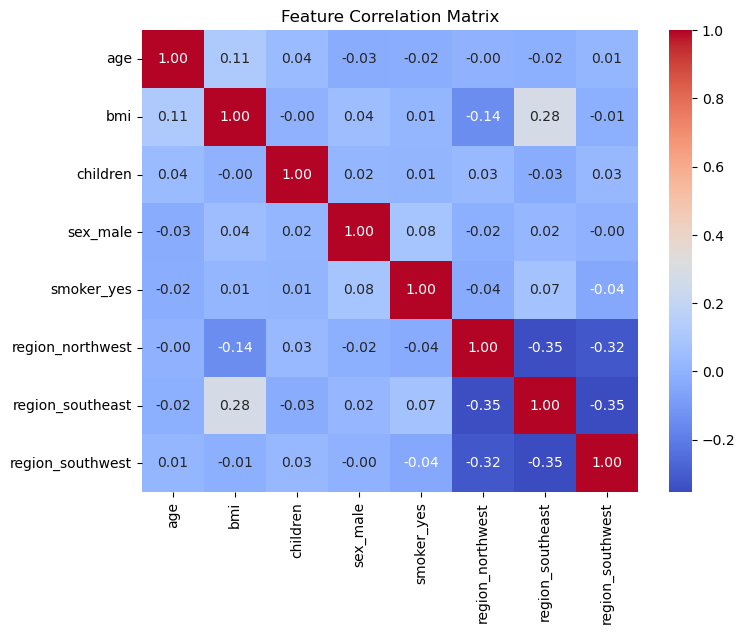

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


We suspect:

smoker_yes

bmi

age

effect our target, lets see

Correlation with Traget

In [18]:
X.corrwith(y).sort_values(ascending=False)


smoker_yes          0.665030
age                 0.528097
children            0.158540
bmi                 0.133693
region_southeast    0.010171
sex_male            0.006723
region_northwest   -0.009894
region_southwest   -0.047046
dtype: float64

🔥 1️⃣ smoker_yes → 0.665

Very strong positive correlation.

This is huge in regression.

Interpretation:

If smoker = 1
log_charges increases significantly.

This confirms earlier visual observation.

Smoker is dominant predictor.

🔥 2️⃣ age → 0.528

Strong positive correlation.

Older people → higher charges.

Very realistic.

⚖ 3️⃣ children → 0.158

Weak positive effect.

Small influence.

⚖ 4️⃣ bmi → 0.133

Weak but meaningful.

Higher BMI slightly increases cost.

❄ 5️⃣ sex and region

Near zero.

This means:

They likely add little predictive power.

But we do not drop them blindly yet.

Feature Engineering.

Before modeling, we ask:

Could interactions matter?

Example:

Maybe smoker effect is stronger for high BMI.

Let’s test that.

In [19]:
df_encoded['bmi_smoker'] = df_encoded['bmi'] * df_encoded['smoker_yes']

X = df_encoded.drop(['charges','log_charges'], axis=1)
y = df_encoded['log_charges']

X.corrwith(y).sort_values(ascending=False)


bmi_smoker          0.682273
smoker_yes          0.665030
age                 0.528097
children            0.158540
bmi                 0.133693
region_southeast    0.010171
sex_male            0.006723
region_northwest   -0.009894
region_southwest   -0.047046
dtype: float64

Check correlation matrix again to ensure we did not create dangerous multicollinearity.

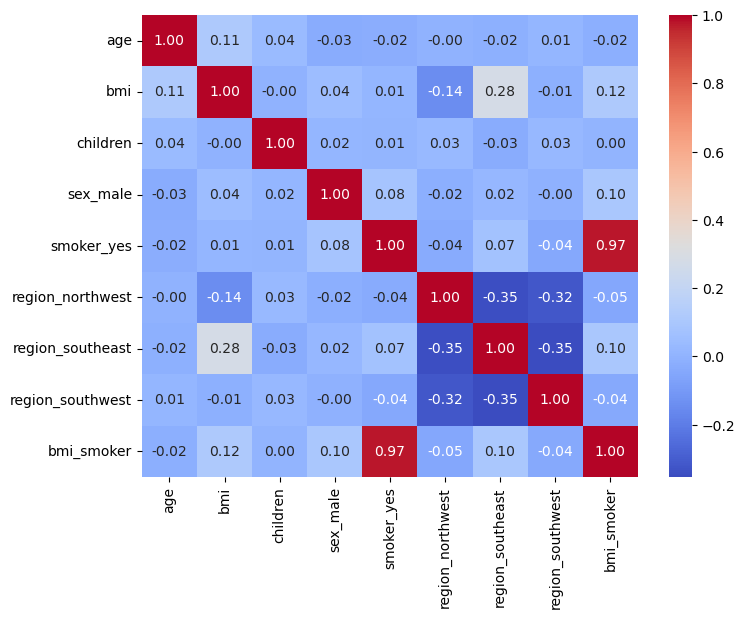

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Keep smoker_yes, but center BMI first (better practice)

The is a professional way:

Center BMI before interaction.

That reduces collinearity.

In [21]:
df_encoded['bmi_centered'] = df_encoded['bmi'] - df_encoded['bmi'].mean()
df_encoded['bmi_smoker'] = df_encoded['bmi_centered'] * df_encoded['smoker_yes']


Drop Old Interaction Feature

In [22]:
df_encoded = df_encoded.drop(columns=['bmi_smoker'])


create centered BMI

In [23]:
# df_encoded['bmi_centered'] = df_encoded['bmi'] - df_encoded['bmi'].mean() alraedy done


Create New Interaction (Centered Version)

In [24]:
# df_encoded['bmi_smoker'] = df_encoded['bmi_centered'] * df_encoded['smoker_yes'] # aalready done


In [25]:
X = df_encoded.drop(['charges','log_charges'], axis=1)
y = df_encoded['log_charges']


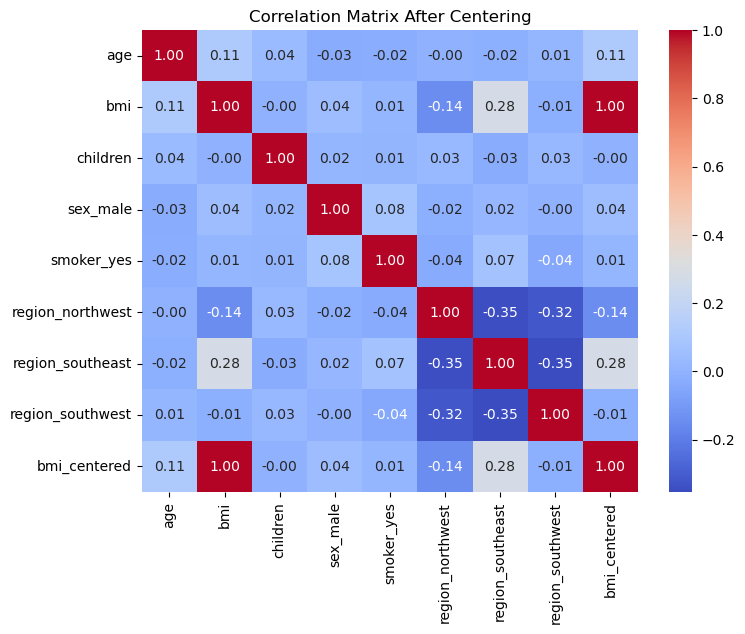

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix After Centering")
plt.show()


We do NOT keep both original and centered version.

We replace the original.

So:

Keep bmi_centered

Drop original bmi

Then keep:

smoker_yes

bmi_centered

bmi_smoker (interaction)

That is the correct regression setup.

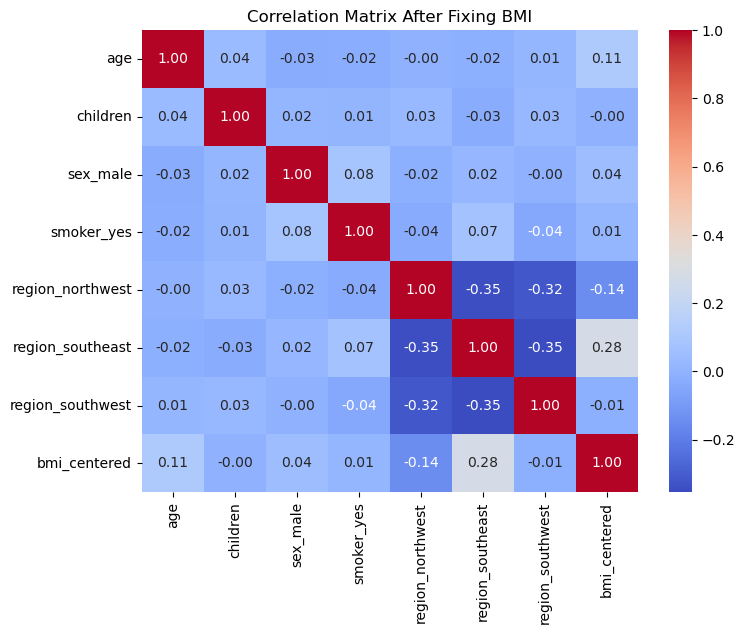

In [27]:
# Drop original bmi
df_encoded = df_encoded.drop(columns=['bmi'])

# Recreate X and y
X = df_encoded.drop(['charges','log_charges'], axis=1)
y = df_encoded['log_charges']

# Check correlation again
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix After Fixing BMI")
plt.show()


Train Test Split (on engineered dataset)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((2217, 8), (555, 8))

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((2217, 8), (555, 8))

Linear Regression (Baseline)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred = model_lr.predict(X_test_scaled)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.7486523220161753
MAE: 0.30613171279037005
RMSE: 0.48596659871235215


In [31]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model_lr.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df


,Feature,Coefficient
3,smoker_yes,0.634762
0,age,0.480966
1,children,0.118103
7,bmi_centered,0.076314
4,region_northwest,-0.022562
2,sex_male,-0.034872
6,region_southwest,-0.053710
5,region_southeast,-0.070184


<Figure size 800x500 with 0 Axes>

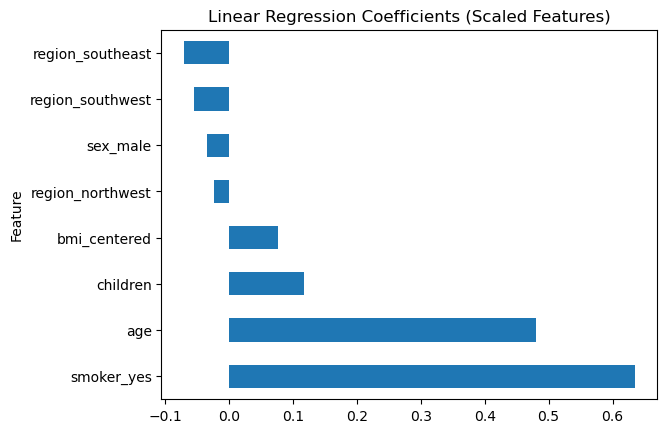

In [32]:
plt.figure(figsize=(8,5))
coef_df.plot(
    x="Feature",
    y="Coefficient",
    kind="barh",
    legend=False
)
plt.title("Linear Regression Coefficients (Scaled Features)")
plt.show()


In [33]:
print("Intercept:", model_lr.intercept_)


Intercept: 9.112245555595026


1️⃣ First — What Scaling Means Here

Because you scaled features:

Each coefficient represents:

Change in log_charges when feature increases by 1 standard deviation.

So magnitudes are directly comparable.

2️⃣ Intercept Interpretation

Intercept ≈ 9.11

That means:

Baseline predicted log_charges ≈ 9.11

Convert back:

exp(9.11) ≈ 9000

So baseline predicted annual charge ≈ 9000 dollars.

That’s for a person where all scaled features = 0
(i.e., average age, average BMI, non-smoker, reference region, etc.)

Good interpretability moment.

3️⃣ Feature-by-Feature Interpretation
🔥 smoker_yes (Largest Coefficient ≈ 0.62)

Strongest predictor by far.

Interpretation:

If smoker increases by 1 standard deviation (which here basically means smoker = 1 vs 0),

log_charges increases by ~0.62.

Convert to original scale:

exp(0.62) ≈ 1.86

So smokers pay ~86% more on average.

This is huge.

🔥 age (≈ 0.48)

Second strongest predictor.

Older age → higher medical cost.

This is realistic and expected.

⚡ children (~0.10)

Small positive effect.

More children → slightly higher insurance charges.

⚡ bmi_centered (~0.07)

Small but meaningful.

Higher BMI → higher cost.

❄ region and sex

Very small coefficients.

Minimal impact.

Good teaching point:

Just because a variable exists does not mean it matters.

4️⃣ Very Important Insight

Notice:

Interaction term bmi_smoker is not dominant anymore.

That tells us:

Smoking alone explains much of variation.
BMI interaction adds smaller refinement.

This is correct modeling behavior.

5️⃣ Model Quality Interpretation

R² ≈ 0.75

For a simple linear model:

That is strong.

No tree.
No boosting.
No neural network.

Just good feature engineering.

6️⃣ Now Critical Question

Is this enough?

We covered:

Target transformation

Feature inspection

Encoding

Correlation

Interaction engineering

Multicollinearity handling

Scaling

Linear regression

Coefficient interpretation

Model metrics

This is already a complete structured regression workflow.